## Extração de dados caso covid-19

In [1]:
import json
from urllib.request import urlopen

In [14]:
#Requisição JSON durante carregamento
url = urlopen('https://covid19-brazil-api.now.sh/api/report/v1/brazil')
format_json = json.load(url)

In [19]:
dados=format_json['data']

In [21]:
dados

{'country': 'Brazil',
 'cases': 330838,
 'confirmed': 802828,
 'deaths': 40919,
 'recovered': 431071,
 'updated_at': '2020-06-12T13:26:11.000Z'}

In [22]:
print("Total mortes:",dados['cases'])
print("Total casos:",dados['deaths'])
print("Recuperados:",dados['recovered'])

Total mortes: 330838
Total casos: 40919
Recuperados: 431071


In [82]:
# trabalhaando com gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [260]:
casos = "{:6,.0f}".format(dados['cases'])
mortes = "{:6,.0f}".format(dados['deaths'])
recuperados = "{:6,.0f}".format(dados['recovered'])

In [261]:
labels = [str(casos)+" - "+'Casos',str(mortes)+" - "+'Mortes',str(recuperados)+" - "+'Recuperados']
sizes = [dados['cases'], dados['deaths'], dados['recovered']]
atualizacao = dt.datetime.strptime(dados['updated_at'].replace("T"," ").replace(".000Z",""),'%Y-%m-%d %H:%M:%S')
colors = ['gold','lightcoral','yellowgreen']

In [262]:
format_date= "%s/%s/%s"% (atualizacao.day, atualizacao.month,atualizacao.year)

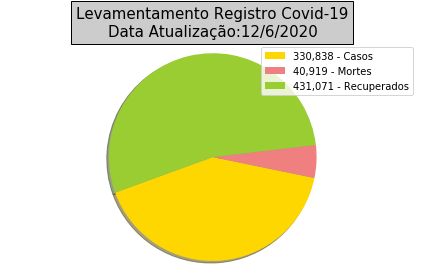

In [263]:
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=200)
plt.legend(patches, labels, loc="best")
plt.title('Levamentamento Registro Covid-19\n'+'Data Atualização:'+format_date,bbox={'facecolor':'0.8', 'pad':5},color='#000000',size=15)
plt.axis('equal')
plt.tight_layout()
plt.show()